<a href="https://colab.research.google.com/github/nikizadehgfdl/thin-wall-topography/blob/colab/python/algorithm_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook is for developement and testing of algorithm for the thin wall topography

## 3.1 Fine grid generation and interpolation

### Create test grids

Some helper functions

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Helper functions

def plot_mesh_in_latlon(lam, phi, stride=1, phi_color='k', lam_color='r',alpha=1.0):
    #mesh plot
    if (phi.shape != lam.shape): raise Exception('Ooops: lam and phi should have same shape')
    nj,ni = lam.shape
    for i in range(0,ni,stride):
        plt.plot(lam[:,i],phi[:,i],lam_color, alpha=alpha)
    for j in range(0,nj,stride):
        plt.plot(lam[j,:],phi[j,:],phi_color, alpha=alpha)

def generate_rect_test_grid(lons,lone,ni,lats,late,nj):
    #generate a simple rectilinear grid
    lon = lons + np.arange(ni+1) * (lone-lons)/ni
    lat = lats + np.arange(nj+1) * (late-lats)/nj
    lon_grid = np.tile(lon, (nj+1,1)) 
    lat_grid = np.tile(lat.reshape(nj+1,1), (1,ni+1))
    return lon_grid,lat_grid

#### Generate test topography

Actual source data like GEBCO (below) are too large for devloping/tesing. Here we use simple small recitilinear grids to sart

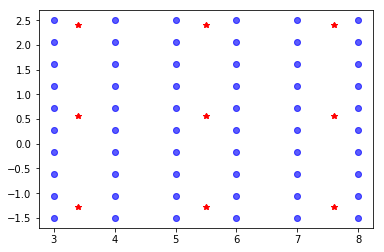

In [17]:
#Let's start with some small rectilinear grids for testing
#source grid 
src_lon_grid,src_lat_grid = generate_rect_test_grid(lons=3,lone=8,ni=5,lats=-1.5,late=2.5,nj=9)
#target grid
trg_lon_grid,trg_lat_grid = generate_rect_test_grid(3.4,7.6,2,-1.28,2.4,2)
plot_mesh_in_latlon(src_lon_grid, src_lat_grid, phi_color='bo', lam_color='bo',alpha=0.4)
plot_mesh_in_latlon(trg_lon_grid, trg_lat_grid, phi_color='r*', lam_color='r*')

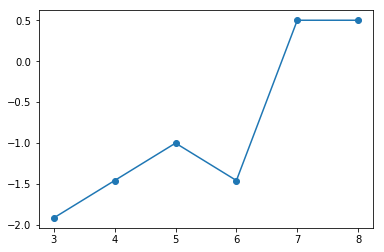

In [150]:
#Generate a fake source topography with a ridge in the middle
PI_180=np.pi/180
src_z = -1 - 1000*np.abs(np.sin((src_lon_grid-5) *PI_180) * np.sin((src_lat_grid-1.0) *PI_180))
#Add some positive height points as land
src_z[9,5] = 0.5
src_z[9,4] = 0.5
src_z[8,4] = 0.5
src_z[8,5] = 0.5

#plt.pcolormesh(src_lon_grid[0,:],src_lat_grid[:,0],src_z); plt.colorbar(extend='both');
#plt.pcolormesh(src_z); plt.colorbar(extend='both');
plt.plot(src_lon_grid[0,:],src_z[-1,:], marker='o')

### GridMesh Class

### 3.1.1 Refine the target grid

### 3.1.2. Project source data (height) onto to the finest refined grid

#### Project nearest neighbor

In [177]:
import inspect
import imp  
import GMesh as gm

#Reload the GMesh tool (in case you change something in the tool and want it to take effect in this notebook)
imp.reload(gm) 

gm_source = inspect.getsource(gm)
#print(gm_source)

refinedGMlist, hits = gm.refine_loop(trg_lon_grid,trg_lat_grid, src_lon_grid,src_lat_grid)
#refinedGMlist[-1].dump()

refinedGMlist[-1].project_source_data_onto_target_mesh(src_lon_grid,src_lat_grid,src_z)

refinedGMlist[-1].coarsenby2(refinedGMlist[-2])
refinedGMlist[-1].dump()
refinedGMlist[-2].dump()

#plt.pcolormesh(refinedGMlist[-2].x,refinedGMlist[-2].y, refinedGMlist[-2].height); plt.colorbar();  

refinedGMlist[-2].coarsenby2(refinedGMlist[-3])
refinedGMlist[-2].dump()
refinedGMlist[-3].dump()

#plt.pcolormesh(refinedGMlist[-3].x,refinedGMlist[-3].y, refinedGMlist[-3].height); plt.colorbar();  

refinedGMlist[-3].coarsenby2(refinedGMlist[-4])
refinedGMlist[-3].dump()
refinedGMlist[-4].dump()

#plt.pcolormesh(refinedGMlist[-4].x,refinedGMlist[-4].y, refinedGMlist[-4].height); plt.colorbar();  

Missed some! Must Refine! Stage  1 grid shape (3, 3)
Missed some! Must Refine! Stage  2 grid shape (5, 5)
Missed some! Must Refine! Stage  3 grid shape (9, 9)
Hit all! Done refining after  3  steps!
<GMesh ni:16 nj:16 shape:(16,16)>
x.rfl   = 3
x.shape = (17, 17)
y.shape = (17, 17)
h.shape = (17, 17)
<GMesh ni:8 nj:8 shape:(8,8)>
x.rfl   = 2
x.shape = (9, 9)
y.shape = (9, 9)
h.shape = (9, 9)
<GMesh ni:8 nj:8 shape:(8,8)>
x.rfl   = 2
x.shape = (9, 9)
y.shape = (9, 9)
h.shape = (9, 9)
<GMesh ni:4 nj:4 shape:(4,4)>
x.rfl   = 1
x.shape = (5, 5)
y.shape = (5, 5)
h.shape = (5, 5)
<GMesh ni:4 nj:4 shape:(4,4)>
x.rfl   = 1
x.shape = (5, 5)
y.shape = (5, 5)
h.shape = (5, 5)
<GMesh ni:2 nj:2 shape:(2,2)>
x.rfl   = 0
x.shape = (3, 3)
y.shape = (3, 3)
h.shape = (3, 3)


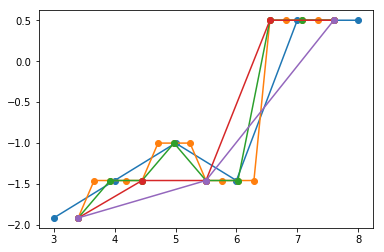

In [178]:
#plt.pcolormesh(refinedGMlist[-1].x,refinedGMlist[-1].y, refinedGMlist[-1].height); plt.colorbar();
plt.plot(src_lon_grid[0,:],src_z[-1,:], marker='o')
plt.plot(refinedGMlist[-1].x[-1,:],refinedGMlist[-1].height[-1,:], marker='o')
plt.plot(refinedGMlist[-2].x[-1,:],refinedGMlist[-2].height[-1,:], marker='o')
plt.plot(refinedGMlist[-3].x[-1,:],refinedGMlist[-3].height[-1,:], marker='o')
plt.plot(refinedGMlist[-4].x[-1,:],refinedGMlist[-4].height[-1,:], marker='o')

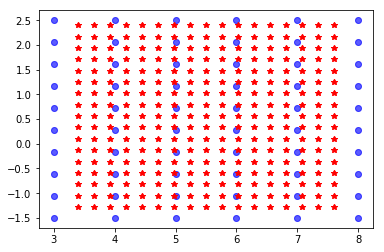

In [168]:
plot_mesh_in_latlon(src_lon_grid, src_lat_grid, phi_color='bo', lam_color='bo',alpha=0.4)
plot_mesh_in_latlon(refinedGMlist[-1].x,refinedGMlist[-1].y , phi_color='r*', lam_color='r*')

## 3.2. Initial thin wall parameters

For each fine target cell assign 4 thin walls with heights equal to the interpolated value above.

In [61]:
a=np.zeros(2)
print(a,a.shape)

[ 0.  0.] (2,)


## Sand Box

## GEBCO dataset

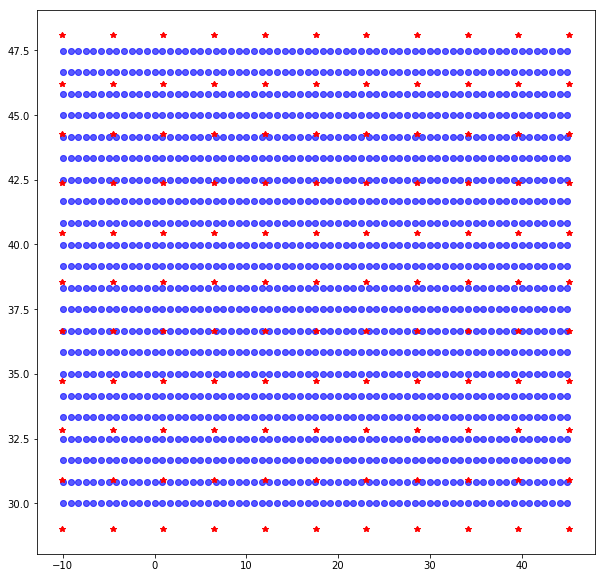

In [51]:
#import netCDF4

#gebcodata = netCDF4.Dataset('http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/MED_GEBCO_30sec.nc')
#gebcodata = netCDF4.Dataset('/net2/nnz/thin-wall-topography/python/workdir/MED_GEBCO_30sec.nc')
#gebcodata
#for var in gebcodata.variables :  print(var,end=' ')
#lat lon elevation     
#Note that the variables are arrays but they are not numpy arrays. 
#Convert them to numpy using np.array so that they can be reshaped.
#gebco_lon = np.array(gebcodata.variables['lon'])
#gebco_lat = np.array(gebcodata.variables['lat'])
#gebco_elv = np.array(gebcodata.variables['elevation'])
#print('source grid array shapes: ' , gebco_lon.shape,gebco_lat.shape,gebco_elv.shape)
#source grid array shapes:  (6601,) (2162,) (2162, 6601)

#test a target grid
#plt.figure(figsize=(10,10))
#trg2_lon_grid,trg2_lat_grid = generate_rect_test_grid(-10.1,45.2,1000,29.,48.1,1000)
#plot_mesh_in_latlon(gebco_lon_grd[::100,::100], gebco_lat_grd[::100,::100], phi_color='bo', lam_color='bo',alpha=0.4)
#plot_mesh_in_latlon(trg2_lon_grid[::100,::100], trg2_lat_grid[::100,::100], phi_color='r*', lam_color='r*')

In [5]:
#import netCDF4
#import numpy as np
#gebcodata = netCDF4.Dataset('/archive/gold/datasets/topography/GEBCO_08_v1.nc')
#gebcodata
#for var in gebcodata.variables :  print(var,end=' ')
#latitude longitude depth     
#Note that the variables are arrays but they are not numpy arrays. 
#Convert them to numpy using np.array so that they can be reshaped.
#gebco_lon = np.array(gebcodata.variables['longitude'])
#gebco_lat = np.array(gebcodata.variables['latitude'])
#gebco_elv = np.array(gebcodata.variables['depth'])
#print('source grid array shapes: ' , gebco_lon.shape,gebco_lat.shape,gebco_elv.shape)
#source grid array shapes:  (43200,) (21600,) (21600, 43200)

source grid array shapes:  (43200,) (21600,) (21600, 43200)


In [9]:
import netCDF4
import numpy as np
gebcodata2014 = netCDF4.Dataset('/net2/nnz/thin-wall-topography/python/workdir/GEBCO_2014_2D.nc')
gebcodata2014
#for var in gebcodata2014.variables :  print(var,end=' ')
#latitude longitude depth     
#Note that the variables are arrays but they are not numpy arrays. 
#Convert them to numpy using np.array so that they can be reshaped.
gebco_lon = np.array(gebcodata2014.variables['lon'])
gebco_lat = np.array(gebcodata2014.variables['lat'])
gebco_elv = np.array(gebcodata2014.variables['elevation'])
print('source grid array shapes: ' , gebco_lon.shape,gebco_lat.shape,gebco_elv.shape)
#source grid array shapes:  (6601,) (2162,) (2162, 6601)

gebco_lon_grd = np.tile(gebco_lon,(gebco_lat.shape[0],1))
gebco_lat_grd = np.tile(gebco_lat.reshape(gebco_lat.shape[0],1),(1,gebco_lon.shape[0]))
print('source grid array shapes: ' , gebco_lon_grd.shape,gebco_lat_grd.shape,gebco_elv.shape)
print('source grid nominal resolution : ',gebco_lon[-1]-gebco_lon[-2],gebco_lat[-1]-gebco_lat[-2] ) 
#source grid array shapes:  (2162, 6601) (2162, 6601) (2162, 6601)
#source grid nominal resolution :  0.00833333333333 0.00833333333333

print(gebco_lon_grd[0,0],gebco_lon_grd[-1,-1], gebco_lat_grd[0,0],gebco_lat_grd[-1,-1])
delxs= gebco_lon_grd[0,1]-gebco_lon_grd[0,0]
delys= gebco_lat_grd[1,0]-gebco_lat_grd[0,0]
print("delxs,delys: ", delxs,delys )
print((48.1-gebco_lat_grd[0,0])/delys)
print(gebco_lon_grd.shape[1],gebco_lat_grd.shape[0])
#-179.995833333 179.995833333 -89.9958333333 89.9958333333
#delxs,delys:  0.00833333333333 0.00833333333333
#16571.5
#43200 21600

source grid array shapes:  (43200,) (21600,) (21600, 43200)
source grid array shapes:  (21600, 43200) (21600, 43200) (21600, 43200)
source grid nominal resolution :  0.00833333332704 0.00833333333334
-179.995833333 179.995833333 -89.9958333333 89.9958333333
delxs,delys:  0.00833333333333 0.00833333333333
16571.5
43200 21600


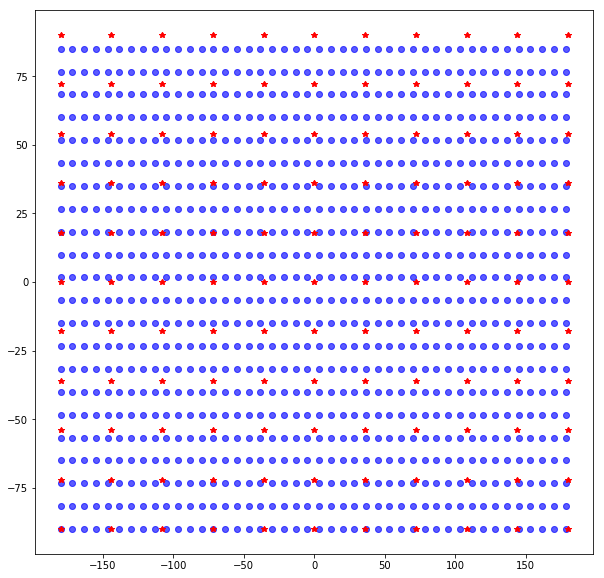

In [10]:
#test a target grid
plt.figure(figsize=(10,10))
trg2_lon_grid,trg2_lat_grid = generate_rect_test_grid(-179.9999,179.9999,10000,-89.9999,89.9999,10000)
plot_mesh_in_latlon(gebco_lon_grd[::1000,::1000], gebco_lat_grd[::1000,::1000], phi_color='bo', lam_color='bo',alpha=0.4)
plot_mesh_in_latlon(trg2_lon_grid[::1000,::1000], trg2_lat_grid[::1000,::1000], phi_color='r*', lam_color='r*')

In [ ]:
#This will crash workstations!!!!!
#refinedGMlist2014, hits2014 = refine_loop(trg2_lon_grid,trg2_lat_grid, gebco_lon_grd,gebco_lat_grd)

Missed some! Must Refine! Stage  1 grid shape (10001, 10001)


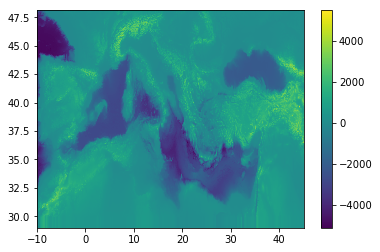

In [60]:
refinedGMlist_2[-1].project_source_data_onto_target_mesh(gebco_lon_grd,gebco_lat_grd,gebco_elv)
plt.pcolormesh(refinedGMlist_2[-1].x,refinedGMlist_2[-1].y, refinedGMlist_2[-1].height); plt.colorbar();    

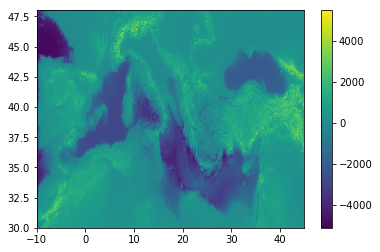

In [12]:
#plt.pcolormesh(gebco_lon_grd[:,:], gebco_lat_grd[:,:],gebco_elv[:,:]);plt.colorbar();

In [23]:
#My workstation runs out of its 65G memory  and starts swapping towards a crash at Stage 6
#We cannot keep the list of meshes and have to free up memory!!!
#refinedGMlist_2 = refine_loop(trg2_lon_grid,trg2_lat_grid, gebco_lon_grd,gebco_lat_grd)
#Missed some! Must Refine! Stage  1 grid shape (1001, 1001)
#Missed some! Must Refine! Stage  2 grid shape (2001, 2001)
#Missed some! Must Refine! Stage  3 grid shape (4001, 4001)
#Missed some! Must Refine! Stage  4 grid shape (8001, 8001)
#Missed some! Must Refine! Stage  5 grid shape (16001, 16001)
#Missed some! Must Refine! Stage  6 grid shape (32001, 32001)
#There was a bug causing this!! 
#Nevertheless, this might be a real issue in higher resolution.

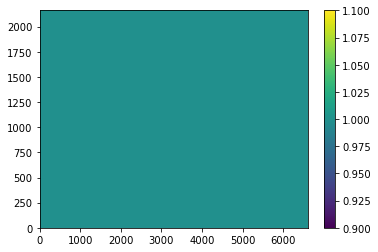

In [58]:
plt.pcolormesh(hits); plt.colorbar();

In [15]:
a = np.array([0.1, 0.5, 0.9, 1.1, 1.5])
np.floor(a+0.5)

array([ 0.,  1.,  1.,  1.,  2.])